## **Exploring Political Contributions**

Spring 2025 Data Science Project

By Charles Stevens and Shaman Murshed

**Contributions Summary**

A: Project idea


*   Charles 100%




B: Dataset Curation and Preprocessing
*   Shaman 100%

C: Data Exploration and Summary Statistics
*   Charles 100%

D: ML Algorithm Design/Development
*   Charles 50%
*   Shaman 50%

E: ML Algorithm Training and Test Data Analysis
*   Charles 50%
*   Shaman 50%

F: Visualization, Result Analysis, Conclusion
*   Charles 50%
*   Shaman 50%

G: Final Tutorial Report Creation
*   Charles 50%
*   Shaman 50%

<br><br>
*   Charles came up with the project idea and did the data exploration and summary statistics portion of the project. He also contributed 50% of the work for the following sections: ML Algorithm Design/Development, ML Algorithm Training and Test Data Analysis, Visualization, Result Analysis, Conclusion, Final Tutorial Report Creation.


*   Shaman did the dataset curation and preprocessing. He also contributed 50% of the work for the following sections: ML Algorithm Design/Development, ML Algorithm Training and Test Data Analysis, Visualization, Result Analysis, Conclusion, Final Tutorial Report Creation.

**Introduction**

Below, we have analyzed political contribution data to understand the fundraising behavior of various political committees in the United States. The dataset includes quarterly and semi-annual contribution reports filed by committees, alongside metadata such as committee names, locations, and reporting periods.

The primary questions we aim to answer through this analysis are:

Which factors best predict high-contributing committees?

Can we group committees based on their fundraising behavior?

Are there committees whose contribution patterns are statistically unusual?

These questions are important because political campaign financing plays a crucial role in influencing election outcomes. By using machine learning techniques such as logistic regression, Gradient Boosting, and Isolation Forest for anomaly detection, our analysis provides insights that could be useful for transparency efforts, compliance monitoring, understanding characterisitcs of high/low contributions, or further research on campaign finance dynamics.




 Import Dataset and View Types

In [ ]:
# load in and display dataset

import pandas as pd

df = pd.read_csv('./content/lobbyist_bundle.csv')
display(df)

,Committee_Id,Committee_Name,Link_Image,Committee_Election_State,Committee_Election_District,Report_Type,Receipt_Date,Coverage_Start_Date,Coverage_End_Date,Quarterly_Contribution,Semi_Annual_Contribution
0,C00000935,DCCC,http://docquery.fec.gov/cgi-bin/fecimg/?_20250...,NaN,NaN,MARCH MONTHLY,19-MAR-25,01-FEB-25,28-FEB-25,2406000.0,0.00
1,C00000935,DCCC,http://docquery.fec.gov/cgi-bin/fecimg/?_20250...,NaN,NaN,FEBRUARY MONTHLY,20-FEB-25,01-JAN-25,31-JAN-25,3360400.0,0.00
2,C00703975,HARRIS FOR PRESIDENT,http://docquery.fec.gov/cgi-bin/fecimg/?_20250...,NaN,NaN,MONTHLY SEMI-ANNUAL (YE),31-JAN-25,26-NOV-24,31-DEC-24,0.0,313084.41
3,C00653816,COMMITTEE TO ELECT JARED GOLDEN,http://docquery.fec.gov/cgi-bin/fecimg/?_20250...,ME,2.0,QUARTERLY SEMI-ANNUAL (YE),31-JAN-25,26-NOV-24,31-DEC-24,0.0,224206.12
4,C00744946,HARRIS VICTORY FUND,http://docquery.fec.gov/cgi-bin/fecimg/?_20250...,NaN,NaN,QUARTERLY SEMI-ANNUAL (YE),31-JAN-25,26-NOV-24,31-DEC-24,0.0,5326538.74
...,...,...,...,...,...,...,...,...,...,...,...
1629,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,http://docquery.fec.gov/cgi-bin/fecimg/?_29934...,NaN,NaN,JUNE MONTHLY,19-JUN-09,01-MAY-09,31-MAY-09,30000.0,0.00
1630,C00042366,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,http://docquery.fec.gov/cgi-bin/fecimg/?_29020...,NaN,NaN,JUNE MONTHLY,19-JUN-09,01-MAY-09,31-MAY-09,68500.0,0.00
1631,C00417519,PROGRESSIVE VICTORY FUND POLITICAL ACTION COMM...,http://docquery.fec.gov/cgi-bin/fecimg/?_29030...,NaN,NaN,MAY MONTHLY,20-MAY-09,01-APR-09,30-APR-09,0.0,NaN
1632,C00042366,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,http://docquery.fec.gov/cgi-bin/fecimg/?_29020...,NaN,NaN,MAY MONTHLY,20-MAY-09,01-APR-09,30-APR-09,209700.0,0.00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# view column types
df.dtypes

,0
Committee_Id,object
Committee_Name,object
Link_Image,object
Committee_Election_State,object
Committee_Election_District,float64
Report_Type,object
Receipt_Date,object
Coverage_Start_Date,object
Coverage_End_Date,object
Quarterly_Contribution,float64


Check Missing/Null Values

In [ ]:
# there are 1634 rows, the following will show us how much data is missing for
# each column

missing_vals = df.isnull().sum()
display(missing_vals)

,0
Committee_Id,0
Committee_Name,0
Link_Image,0
Committee_Election_State,652
Committee_Election_District,927
Report_Type,5
Receipt_Date,0
Coverage_Start_Date,28
Coverage_End_Date,13
Quarterly_Contribution,14


In [ ]:
# convert the receipt_date to datetime
from datetime import datetime

df['Receipt_Date'] = pd.to_datetime(df['Receipt_Date'], format='%d-%b-%y')
df['Receipt_Date'] = df['Receipt_Date'].dt.strftime('%Y-%m-%d')
display(df['Receipt_Date'])

,Receipt_Date
0,2025-03-19
1,2025-02-20
2,2025-01-31
3,2025-01-31
4,2025-01-31
...,...
1629,2009-06-19
1630,2009-06-19
1631,2009-05-20
1632,2009-05-20


In [ ]:
# convert the Coverage_Start_Date to datetime
df['Coverage_Start_Date'] = pd.to_datetime(df['Coverage_Start_Date'], format='%d-%b-%y')
df['Coverage_Start_Date'] = df['Coverage_Start_Date'].dt.strftime('%Y-%m-%d')
display(df['Coverage_Start_Date'])

,Coverage_Start_Date
0,2025-02-01
1,2025-01-01
2,2024-11-26
3,2024-11-26
4,2024-11-26
...,...
1629,2009-05-01
1630,2009-05-01
1631,2009-04-01
1632,2009-04-01


In [ ]:
# convert the Coverage_End_Date to datetime
df['Coverage_End_Date'] = pd.to_datetime(df['Coverage_End_Date'], format='%d-%b-%y')
df['Coverage_End_Date'] = df['Coverage_End_Date'].dt.strftime('%Y-%m-%d')
display(df['Coverage_End_Date'])

,Coverage_End_Date
0,2025-02-28
1,2025-01-31
2,2024-12-31
3,2024-12-31
4,2024-12-31
...,...
1629,2009-05-31
1630,2009-05-31
1631,2009-04-30
1632,2009-04-30


In [ ]:
# describe the data for Report_Type
descr_rep_type = df["Report_Type"].value_counts()
display(descr_rep_type)

,count
Report_Type,
OCTOBER QUARTERLY,274
JULY QUARTERLY / SEMI-ANNUAL,217
QUARTERLY YEAR END / SEMI-ANN,197
APRIL QUARTERLY,188
QUARTERLY SEMI-ANNUAL (YE),105
POST-GENERAL,77
PRE-GENERAL,75
JULY QUARTERLY,65
QUARTERLY SEMI-ANNUAL (MY),65


In [ ]:
# describe the data for Comittee_Name
descr_comm_name = df["Committee_Name"].value_counts()
display(descr_comm_name)

,count
Committee_Name,
DCCC,90
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,65
TAMMY BALDWIN FOR SENATE,53
DSCC,36
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,28
...,...
JOSH RILEY FOR CONGRESS,1
COBURN FOR SENATE 2010,1
L A PAC,1


In [ ]:
# describe the data for quarterly_contribution and semi_annual_contribution

descr_quart = df['Quarterly_Contribution'].describe()
display(descr_quart)

descr_semi = df['Semi_Annual_Contribution'].describe()
display(descr_semi)

,Quarterly_Contribution
count,1.620000e+03
mean,1.570160e+05
std,6.943134e+05
min,0.000000e+00
25%,0.000000e+00
50%,2.705000e+04
75%,7.587750e+04
max,1.076995e+07


,Semi_Annual_Contribution
count,1.479000e+03
mean,1.483373e+05
std,7.252860e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,5.439438e+04
max,1.477103e+07


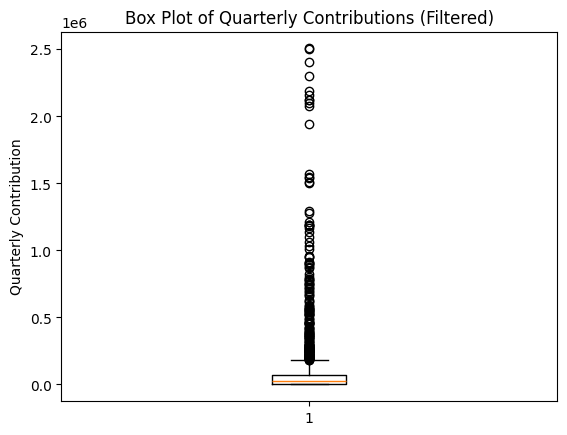

In [ ]:
import matplotlib.pyplot as plt

# create a box plot to visualize outliers in the quarterly contributions

# filter out the most extreme outliers so the box plot actually displays
threshold = df['Quarterly_Contribution'].quantile(0.99)
filtered_data = df[df['Quarterly_Contribution'] < threshold]['Quarterly_Contribution']

plt.boxplot(filtered_data)
plt.title('Box Plot of Quarterly Contributions (Filtered)')
plt.ylabel('Quarterly Contribution')
plt.show()

In [ ]:
# As we can see from the boxplot above, the middle 50 percent of out data is very low. This is because a lot of the data for the quarterly
# contributions are 0 values. We will have to deal with this using one of the methods taught in class.

In [ ]:
# Next we will perform a hypthesis test to test whether the committee election state has an effect on the quarterly contributions
# Null Hypothesis: the committee election state has no effect on the quarterly contribution
# Alternate Hypothesis: the committee election state has an effect on the quarterly contribution
# Will use an alpha value of 0.05

from scipy import stats

# Since there are a lot of null values for the committee election state column, we will treat all null values as it's own category
altered_df = df.copy()
altered_df = altered_df.dropna(subset=['Quarterly_Contribution'])
altered_df.loc[:, 'Committee_Election_State'] = altered_df['Committee_Election_State'].fillna('Unknown')

# filter out groups with less than 2 entries because ANOVA requires at least 2 entries per group
# also filter out groups with no variance
valid_groups_df = altered_df.groupby('Committee_Election_State').filter(
    lambda x: (len(x) > 1) and (x['Quarterly_Contribution'].std() > 0)
)

# now run an ANOVA test
groups = [group['Quarterly_Contribution'].values for name, group in valid_groups_df.groupby('Committee_Election_State')]
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

ANOVA F-statistic: 1.377087073550399
p-value: 0.05576978791239893


In [ ]:
# Based on the results of the ANOVA test, we will fail to reject the null hypothesis. We conclude this because the p value of 0.05576978791239893
# is greater than our alpha value of 0.05. This means that there is not significant evidence to suggest that the committee election state has
# an effect on the quarterly contribution.

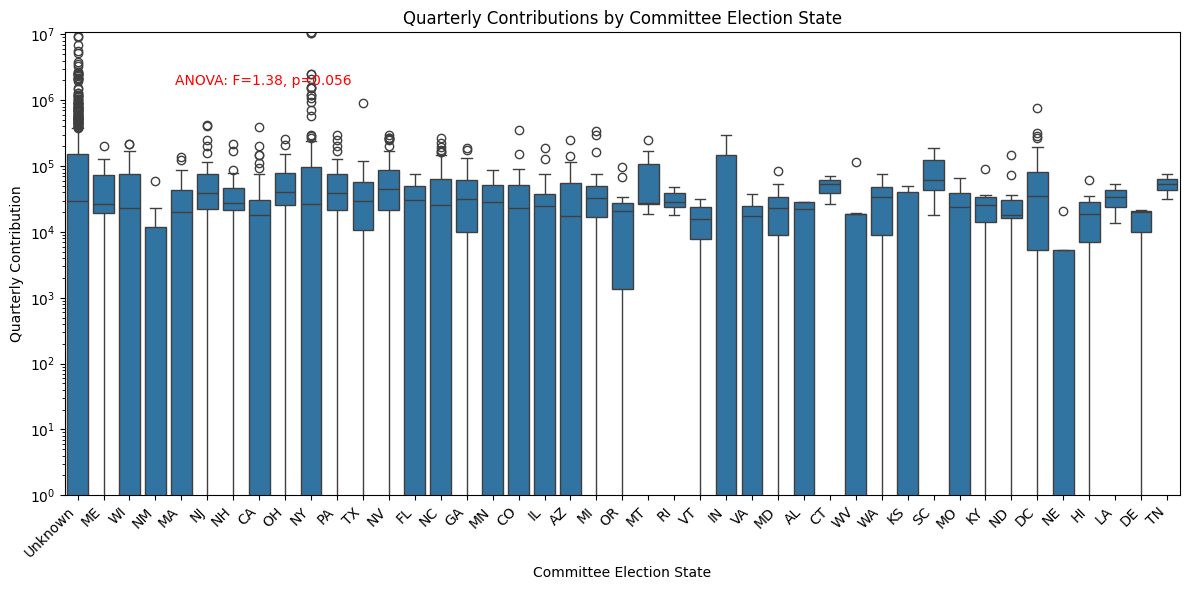

In [ ]:
# Now we will use a box plot to display the results of the ANOVA test
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Committee_Election_State', y='Quarterly_Contribution', data=valid_groups_df)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yscale('log')
plt.ylim(1, valid_groups_df['Quarterly_Contribution'].max())
plt.title('Quarterly Contributions by Committee Election State')
plt.xlabel('Committee Election State')
plt.ylabel('Quarterly Contribution')
plt.xticks(rotation=45)
plt.figtext(0.15, 0.85, f'ANOVA: F={f_stat:.2f}, p={p_val:.3f}', fontsize=10, color='red')
plt.tight_layout()
plt.show()

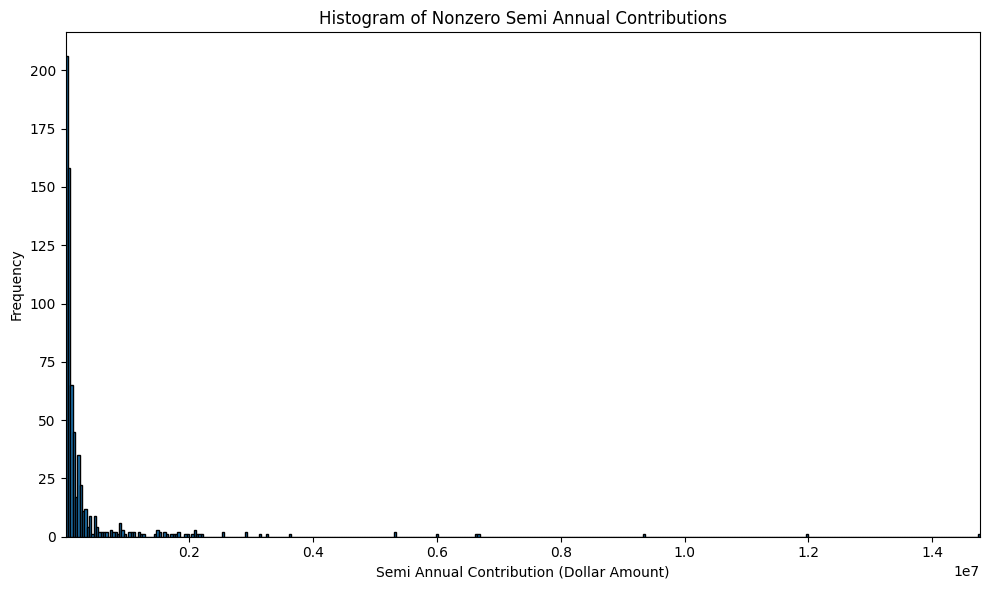

In [ ]:
# Next we will use a histogram to analyze the semi annual contributions

import numpy as np

# Filter out zeros and missing values
semi_annual_data = df['Semi_Annual_Contribution']
semi_annual_data = semi_annual_data[(semi_annual_data != 0.0) & (semi_annual_data.notna())]

# Calculate the Interquartile Range (IQR)
q75, q25 = np.percentile(semi_annual_data, [75, 25])
iqr = q75 - q25

# Compute bin width
bin_width = 2 * iqr / np.cbrt(len(semi_annual_data))
min_val = semi_annual_data.min()
max_val = semi_annual_data.max()

# Compute number of bins; ensure at least one bin is created
num_bins = int(np.ceil((max_val - min_val) / bin_width))
num_bins = max(num_bins, 2)

# Create bins dynamically
bins = np.linspace(min_val, max_val, num_bins)

plt.figure(figsize=(10, 6))
plt.hist(semi_annual_data, bins=bins, edgecolor='black')
plt.xlim(min_val, max_val)
plt.title('Histogram of Nonzero Semi Annual Contributions')
plt.xlabel('Semi Annual Contribution (Dollar Amount)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Based on this histogram we can see that the majority of contributions are on the lower end, with outliers making very high contributions.
# This will be useful since we now know the general distribution of the semi annual contribution column.
# For this histogram, we dropped all 0 values since the majority of rows with 0 in the Semi Annual Contribution column have values in the
# Quarterly Contribution column, and vice versa.

In [ ]:
# Generate basic descriptive statistics
# This will give us some basic insights into the data
desc_stats = semi_annual_data.describe()
print("Descriptive Statistics for Semi Annual Contributions:")
print(desc_stats)

Descriptive Statistics for Semi Annual Contributions:
count    6.720000e+02
mean     3.264745e+05
std      1.049026e+06
min      5.000000e+01
25%      3.253945e+04
50%      6.397105e+04
75%      1.970862e+05
max      1.477103e+07
Name: Semi_Annual_Contribution, dtype: float64


**Exploring the Data using Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# drop null vals regarding quarterly contribution
df_clean = df.dropna(subset=['Quarterly_Contribution']).copy()


# 1 if quarterly contribution > 1, 0 otherswise
median_Qcontribution = df_clean['Quarterly_Contribution'].median()
df_clean['High_Contribution'] = (df_clean['Quarterly_Contribution'] > median_Qcontribution).astype(int)

df_clean['Receipt_Date'] = pd.to_datetime(df_clean['Receipt_Date'], errors='coerce')
df_clean['Coverage_Start_Date'] = pd.to_datetime(df_clean['Coverage_Start_Date'], errors='coerce')

df_clean['Receipt_Year'] = df_clean['Receipt_Date'].dt.year
df_clean['Receipt_Month'] = df_clean['Receipt_Date'].dt.month
df_clean['Coverage_Year'] = df_clean['Coverage_Start_Date'].dt.year
df_clean['Coverage_Month'] = df_clean['Coverage_Start_Date'].dt.month

features = df_clean[['Committee_Election_State', 'Committee_Election_District','Report_Type', 'Semi_Annual_Contribution', 'Receipt_Year', 'Receipt_Month', 'Coverage_Year', 'Coverage_Month']]

# encode categorical features
features_encoded = features.copy()
le_state = LabelEncoder()
le_report = LabelEncoder()
features_encoded['Committee_Election_State'] = le_state.fit_transform(features_encoded['Committee_Election_State'].astype(str))
features_encoded['Report_Type'] = le_report.fit_transform(features_encoded['Report_Type'].astype(str))

# fill in missing values
features_encoded = features_encoded.fillna(0)

# standardize features
scaler = StandardScaler()
X = scaler.fit_transform(features_encoded)

# set target variable
y = df_clean['High_Contribution']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


report_dict = classification_report(y_test, y_pred, output_dict=True)

# convert to dataframe
report_df = pd.DataFrame(report_dict).transpose()

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       167
           1       0.74      0.80      0.77       157

    accuracy                           0.77       324
   macro avg       0.77      0.77      0.77       324
weighted avg       0.77      0.77      0.77       324



From the above code, we can see that the XGBoost Classifier performs well on the dataset. The model does well classifying wherther a contribution is a high contribution or not. This was determined after experimenting with multiple different machine learning models. First Logistic Regression was tried, then Random Forest, and then Gradient Boosting. Gradient Boosting performed the best of all the models, so we decided to stick with that. Then we decided to use XGBoost (extreme gradient boosting) since it had better performance than the regular gradient boosting model.

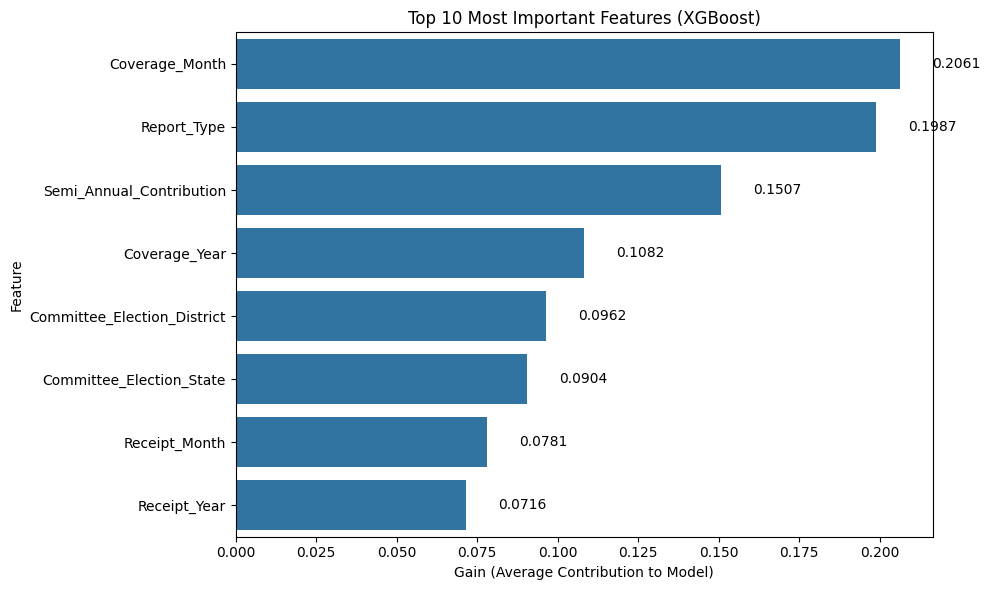

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get actual feature names
actual_feature_names = features_encoded.columns.tolist()

# Get importances and map to names
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': actual_feature_names,
    'Gain': importances
}).sort_values(by='Gain', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=importance_df, x='Gain', y='Feature')

# Add right-aligned labels
for i, value in enumerate(importance_df['Gain']):
    ax.text(value + 0.01, i, f'{value:.4f}', va='center')

plt.title("Top 10 Most Important Features (XGBoost)")
plt.xlabel("Gain (Average Contribution to Model)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The above feature plot displays the importance of each feature to the XGBoost model. Features are ranked by their "gain" - the average contribution each feature made when improving decision splits.

The "Coverage_Month" and "Report_Type" features were had very high gains and were very important to the model when classifying if a contribution was high or not. Both of these features had gain values of above 0.19, which indicates that the model was heavily influenced by both features.

Other important features included "Semi_Annual_Contribution", "Coverage_Year", and election related information like "Committee_Election_District" and "Committee_Election_State".

"Receipt_Month" and "Receipt_Year" were the least influential feautres, indicating that the receipt timing does not have significant influence on the classifying whether a contribution is high or not.

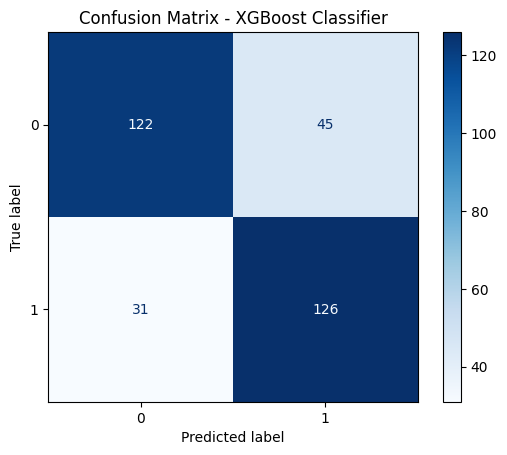

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix using the test set
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.grid(False)
plt.show()

The above confusion matrix shows that the XGBoost model performs well on both classes. As we can see the model predicted 122 true negatives and 126 true positives. We also can see that the model predicted 31 false negatives and 45 false positives. This demonstrates how the model predicts a false classification at a relatively low rate.

Adding up the predictions, we see that the model predicted 171 samples as "high" and 153 samples as "not high". This shows that the model has a slight bias towards predicting class 1 over class 0.

Overall, the confusion matrix supports the conclusion that the model generalizes well to unseen data and has a high performance.

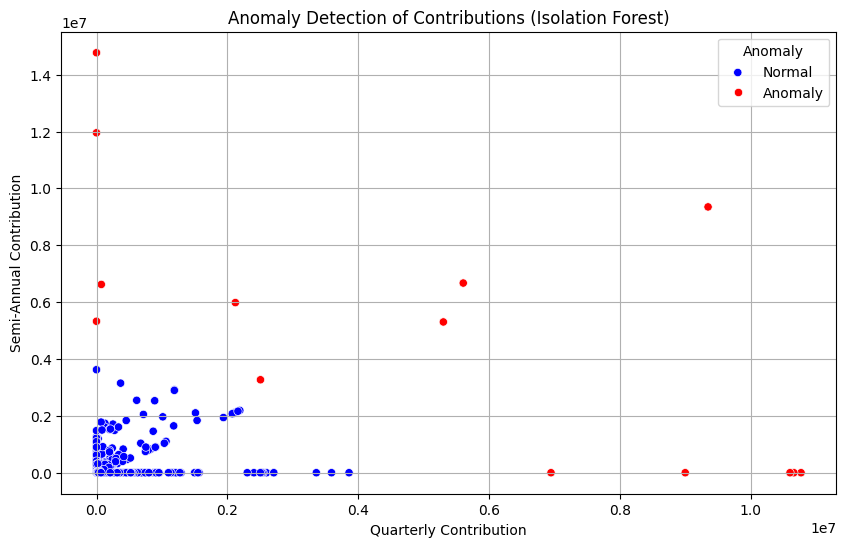

Anomaly
Normal     1457
Anomaly      14
Name: count, dtype: int64

       Quarterly_Contribution  Semi_Annual_Contribution
4                       0.00                5326538.74
117                 73500.00                6621807.50
134               5606173.55                6670773.55
244               2506464.62                3269350.70
272               5302084.16                5302084.16
522               9348404.00                9348404.00
591               6947704.00                      0.00
625               2122700.00                5983031.06
846                     0.00               14771032.61
847              10769947.97                      0.00
887              10660047.97                      0.00
895              10601247.97                      0.00
1147                    0.00               11955240.17
1192              8999719.39                      0.00

Avgerage Contributions: 
 Quarterly_Contribution      167570.928226
Semi_Annual_Contribution    148822.898

,count
Committee_Name,
HILLARY VICTORY FUND,4
TRUMP VICTORY,3
ROMNEY VICTORY INC.,2
HARRIS VICTORY FUND,1
BIDEN VICTORY FUND,1
"TRUMP 47 COMMITTEE, INC.",1
DCCC,1
DSCC,1


In [ ]:
from sklearn.ensemble import IsolationForest

# select features for political contributions
anomaly_data = df[['Committee_Name','Quarterly_Contribution', 'Semi_Annual_Contribution']].dropna()

# standardize
sc = StandardScaler()
X_anomaly = sc.fit_transform(anomaly_data[['Quarterly_Contribution', 'Semi_Annual_Contribution']])

# fit Isolation Forest model
iso_forest = IsolationForest(contamination=0.009, random_state=42)  # 5% anomalies
anomaly_labels = iso_forest.fit_predict(X_anomaly)

# add anomaly_labels to the data (anomaly = -1, normal = 1)
anomaly_data['Anomaly'] = anomaly_labels

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=anomaly_data['Quarterly_Contribution'],
    y=anomaly_data['Semi_Annual_Contribution'],
    hue=anomaly_data['Anomaly'],
    palette={1: "blue", -1: "red"},
)
plt.title('Anomaly Detection of Contributions (Isolation Forest)')
plt.xlabel('Quarterly Contribution')
plt.ylabel('Semi-Annual Contribution')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.grid(True)
plt.show()

# count of normal and anomaly points
anomaly_count = anomaly_data['Anomaly'].value_counts().rename(index={1: 'Normal', -1: 'Anomaly'})
print(anomaly_count)

# table display of anomalous contributions
anomaly_points = anomaly_data[anomaly_data['Anomaly'] == -1][['Quarterly_Contribution', 'Semi_Annual_Contribution']]
print("\n", anomaly_points)


# Calculate average and median contributions across all valid entries
average_contributions = anomaly_data[['Quarterly_Contribution', 'Semi_Annual_Contribution']].mean()
med_contributions = anomaly_data[['Quarterly_Contribution', 'Semi_Annual_Contribution']].median()
print("\nAvgerage Contributions: \n", average_contributions)
print("\nMedian Contributions: \n", med_contributions)

anomalous_rows = anomaly_data[anomaly_data['Anomaly'] == -1]
anom_comms = anomalous_rows["Committee_Name"].value_counts()
display(anom_comms)

The above graph shows the anomalies in political contributions (quarterly + semi annual contributions), outputted from an Isolation Forest model. The model states that 14 out of the 1471 contributions are outliers, assuming that .09% of the data is anomalous.

The tables under the graph display the quarterly and semi annual contributions of the anomalies, and which committee funds are responsbible for the outlier contributions. For comparison, the average and median contributions are also listed.

In a real world situation, tracking these anomalies can provide useful for a couple of applications. For example, election officials could consider these anomalies as supicious, and investigate further to make sure that they fit compliance rules.

**Conclusion**

Through our analysis of political committee contributions, several insights emerged.

Using logistic regression, we found that predicting high-contributing committees based on our chosen features proved to be pretty ineffective, as the model classified contributions with accuracy comparable to a coin toss. We then tried Random Forest and Gradient Boosting, and found decent success with the latter model, especially when we adjusted to using Extreme Gradient Boosting.

We were also able to visualize the features that proved to be most significant in determining whether a contribution is high or not by looking at the gain of each feature.

Additionaly, we implemented anomaly detection using Isolation Forest to flag a small subset of committees with contribution patterns far outside the norm. Such anomalies may warrant further investigation for financial compliance due to their irregularity.

For further study, if we had the data to see which political candidates won, we could analyze the correlation between contributions and political victory, and possibly predict victors given the contributions.
